In [3]:
from matplotlib import pyplot as plt
from pprint import pprint
from llamma import LlammaState, llamma_spot_price, execute_llamma_sell, arb_llamma



LlammaState(x=0, y=1500, p_up=1.2, p_down=1.05, oracle_price=1.2, A=8.000000000000007, y0=1500.0, f=14400.000000000013, g=10500.000000000011, pcd=1.2, pcu=1.56734693877551)
1.2
LlammaState(x=0, y=1500, p_up=1.2, p_down=1.05, oracle_price=1.19, A=8.000000000000007, y0=1487.5000000000002, f=14042.991666666683, g=10500.000000000013, pcd=1.1702493055555554, pcu=1.5284888888888888)
1.1702493055555556
LlammaState(x=118.00833333333321, y=1400.0, p_up=1.2, p_down=1.05, oracle_price=1.19, A=8.000000000000007, y0=1487.5000000000002, f=14042.991666666683, g=10500.000000000013, pcd=1.1702493055555554, pcu=1.5284888888888888)
1.1900000000000002
LlammaState(x=118.00833333333321, y=1400.0, p_up=1.2, p_down=1.05, oracle_price=1.18, A=8.000000000000007, y0=1477.5011604300691, f=13715.150771885534, g=10517.80487085813, pcd=1.1409944444444444, pcu=1.4902784580498865)
1.1607136763116699
LlammaState(x=232.46018257433025, y=1302.204412582434, p_up=1.2, p_down=1.05, oracle_price=1.18, A=8.000000000000007, y0

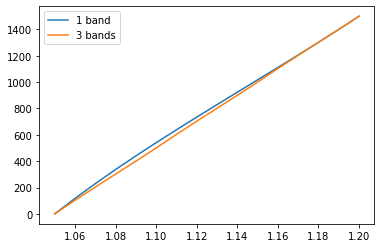

In [4]:
state = LlammaState(x = 0, y = 1500, p_up = 1.2, p_down = 1.05, oracle_price=1.2)
pprint(state)
pprint(llamma_spot_price(state))
price = 1.2
step_size = 0.01
prices = [price]
y_ls = [state.y]
while price > 1.05:
    price -= step_size
    prices.append(price)
    state.update(price)
    pprint(state)
    pprint(llamma_spot_price(state))
    state = arb_llamma(state)
    pprint(state)
    pprint(llamma_spot_price(state))
    y_ls.append(state.y)
    
plt.plot(prices, y_ls, label="1 band")

state = LlammaState(x = 0, y = 500, p_up = 1.2, p_down = 1.15, oracle_price=1.2)
price = 1.2
prices = [price]
y_ls = [state.y + 1000]
while price > 1.15:
    price -= step_size
    prices.append(price)
    state.update(price)
    state = arb_llamma(state)
    y_ls.append(state.y + 1000)
    
state = LlammaState(x = 0, y = 500, p_up = 1.15, p_down = 1.10, oracle_price=1.15)
price = 1.15
# prices = [price]
# y_ls = [state.y]
while price > 1.10:
    price -= step_size
    prices.append(price)
    state.update(price)
    state = arb_llamma(state)
    y_ls.append(state.y + 500)
    
state = LlammaState(x = 0, y = 500, p_up = 1.1, p_down = 1.05, oracle_price=1.1)
price = 1.1
# prices = [price]
# y_ls = [state.y]
while price > 1.05:
    price -= step_size
    prices.append(price)
    state.update(price)
    state = arb_llamma(state)
    y_ls.append(state.y)
    
plt.plot(prices, y_ls, label="3 bands")
plt.legend(loc="upper left")
plt.show()
